In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

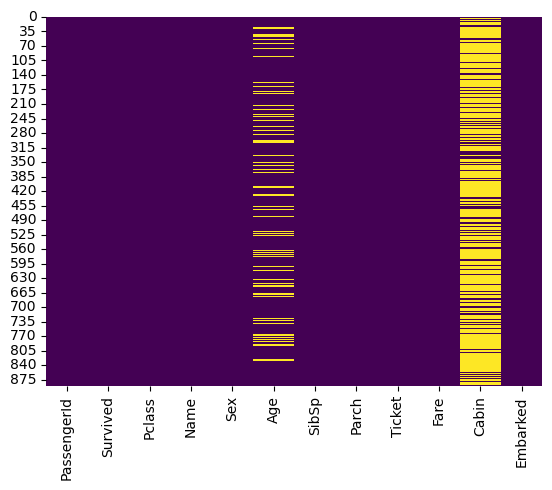

In [5]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

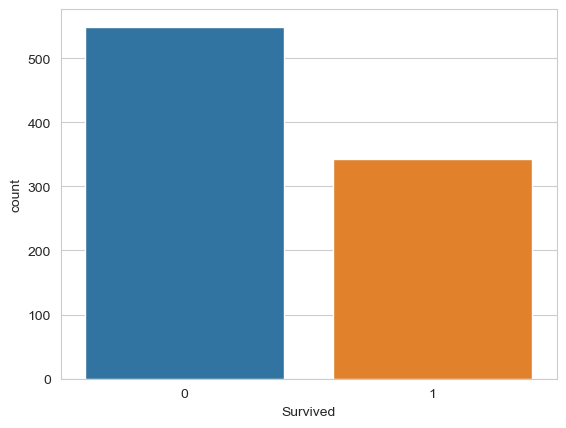

In [6]:
sns.set_style('whitegrid')

sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

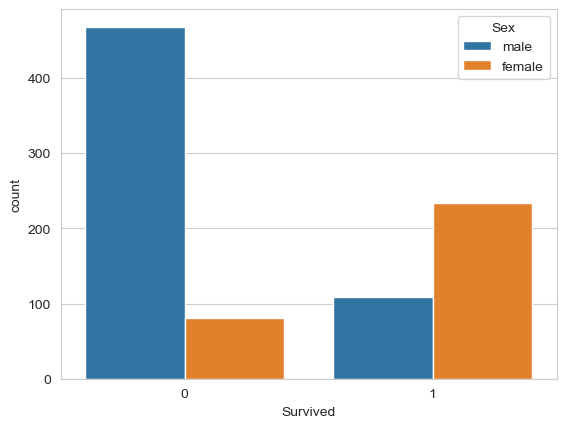

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

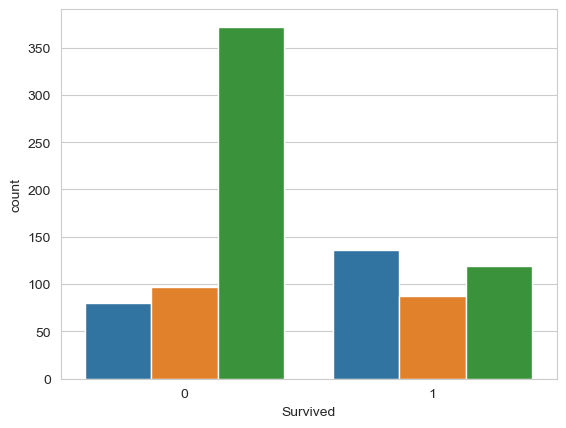

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

C:\Users\mazen\AppData\Local\Temp\ipykernel_14732\2135325968.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False, color='blue',bins=60)


<Axes: xlabel='Age'>

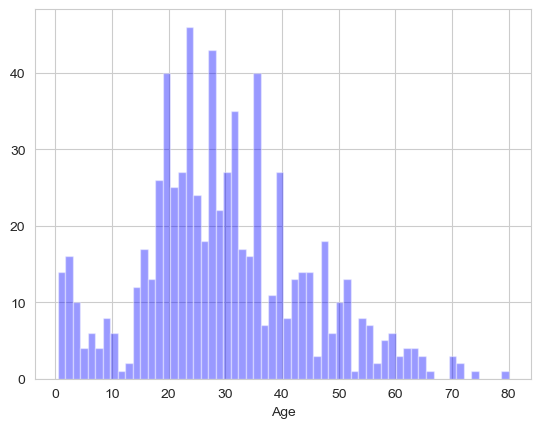

In [9]:
sns.distplot(train['Age'].dropna(),kde=False, color='blue',bins=60)

<Axes: xlabel='SibSp', ylabel='count'>

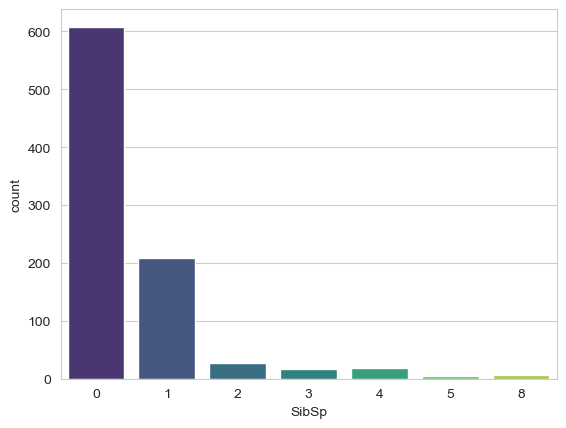

In [10]:
sns.countplot(x='SibSp',data=train,palette='viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

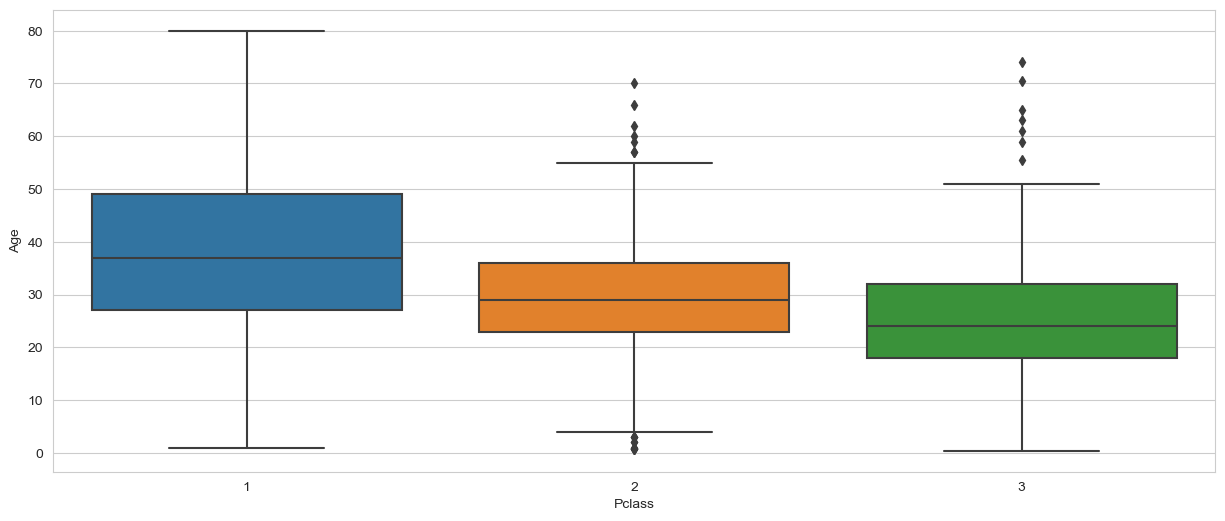

In [13]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Pclass',y='Age',data=train)

In [14]:

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age


In [16]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\mazen\AppData\Local\Temp\ipykernel_14732\3072363992.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\mazen\AppData\Local\Temp\ipykernel_14732\3072363992.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

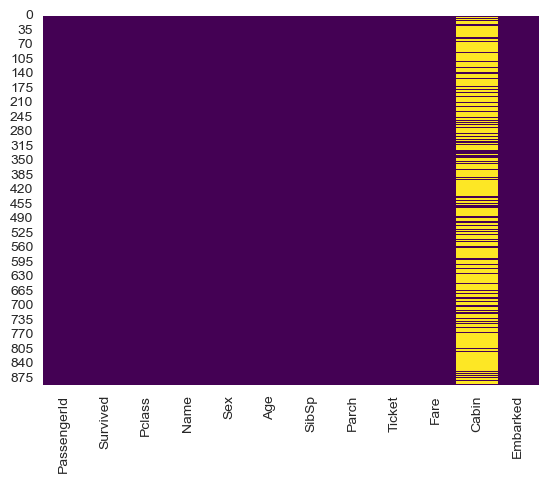

In [17]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

In [18]:
train.drop('Cabin', axis=1,inplace=True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

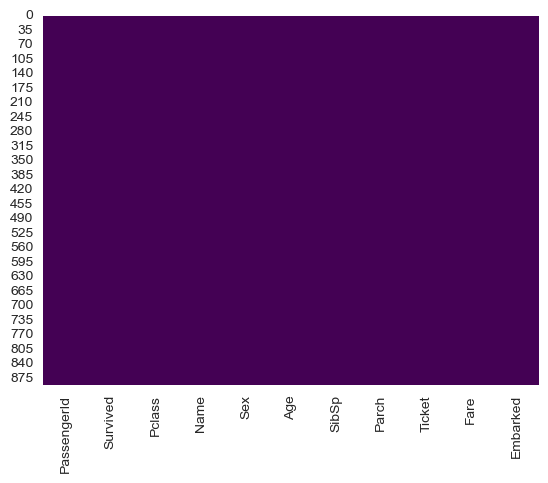

In [20]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

In [21]:
train.dropna(inplace=True)

In [23]:
pd.get_dummies(train['Embarked'],drop_first=True)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [24]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [25]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [27]:
train_new = train.drop('Survived',axis=1)

In [28]:
train_new.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [30]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(train_new,train['Survived'],test_size = 0.2, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
RFC = RandomForestClassifier()

In [38]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
y_pred = RFC.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix

In [45]:
CM = confusion_matrix(y_test,y_pred)

In [46]:
CM

array([[84, 25],
       [26, 43]], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
acc = accuracy_score(y_test,y_pred)

In [49]:
acc

0.7134831460674157

In [50]:
from sklearn.metrics import classification_report

In [51]:
CR = classification_report(y_test,y_pred)

In [52]:
CR

'              precision    recall  f1-score   support\n\n           0       0.76      0.77      0.77       109\n           1       0.63      0.62      0.63        69\n\n    accuracy                           0.71       178\n   macro avg       0.70      0.70      0.70       178\nweighted avg       0.71      0.71      0.71       178\n'